(28, 28, 3)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)   

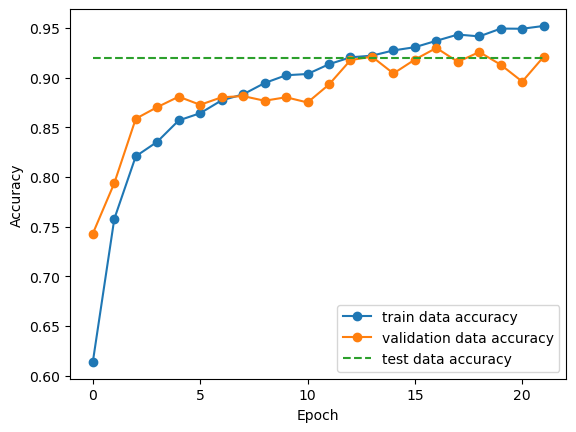

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import layers, models

data = np.load('../Datasets/bloodmnist.npz')

# assign data to train, validation, and test sets. Normalize the pixel value. 
train_data = data['train_images']/255 
train_label = data['train_labels']
val_data = data['val_images']/255
val_label = data['val_labels']
test_data = data['test_images']/255
test_label = data['test_labels']


def CNNpredict(train_data,train_label,val_data,val_label,test_data,test_label):
    '''
    Args: 
        train_data(numpy array): Data for train
        train_label(numpy array): The train data labels
        val_data(numpy array): Data for validation
        val_labels(numpy array): The validation data labels
        test_data(numpy array): Data for test
        test_label(numpy array): The test data labels
    '''
    # biuld model layers
    model = models.Sequential()
    # Filter the image 
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_data[0].shape))
    # Feature selection
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))

    # Add the number of class, select class based on probability
    model.add(layers.Dense(len(np.unique(train_label)), activation='softmax'))

    model.summary()

    # add early stop based on performance on validation data to prevent overfit
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True)

    # compile model
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

    # train model
    history = model.fit(train_data, train_label, epochs=50, 
                        validation_data=(val_data, val_label),
                        callbacks = [early_stopping])

    # classify the test data 
    test_loss, test_accuracy = model.evaluate(test_data, test_label, verbose=2)

    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Test Loss: {test_loss:.2f}")

    # accucy plot for train and prediction
    plt.plot(history.history['accuracy'], 'o-', label='train data accuracy')
    plt.plot(history.history['val_accuracy'], 'o-', label = 'validation data accuracy')
    plt.plot(np.ones(len(history.history['accuracy']))*test_accuracy, '--', label='test data accuracy \n (use the trained model)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Epoch")
    plt.legend(loc='lower right')
    plt.savefig('TaskB.png', dpi=300, bbox_inches='tight')
    plt.show()

CNNpredict(train_data,train_label,val_data,val_label,test_data,test_label)
